In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv(r"C:\Users\Rengarajan\DataScience\ML_Algorithms\Linear_Regression\height-weight.csv")
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0, 0.5, 'Height')

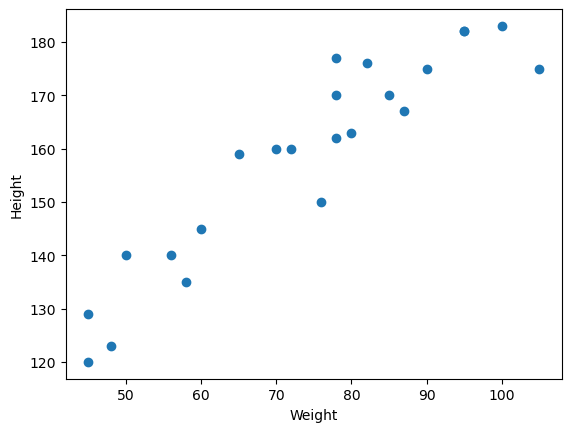

In [4]:
#scatter plot
plt.scatter(df['Weight'],df['Height'])
plt.xlabel("Weight")
plt.ylabel("Height")

<Axes: xlabel='Weight', ylabel='Height'>

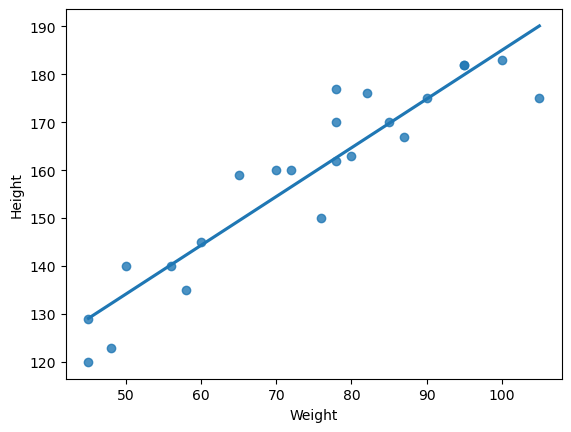

In [5]:
#Draw plot and line
sns.regplot(x='Weight',y='Height',ci=None,data=df)

In [13]:
#Independent and dependent features
X=df[['Weight']]  # independent features should be a dataframe or 2 dimesnionalarray
y=df['Height']    # this variiable can be in series or 1d array

In [14]:
#Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [17]:
df.count()

Weight    23
Height    23
dtype: int64

In [18]:
X_train

,Weight
12,105
1,58
13,100
5,78
2,48
11,95
20,45
3,60
4,70
18,76


In [19]:
X_test

,Weight
15,78
9,78
0,45
8,95
17,65


In [20]:
#Ridge Regression
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge=Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]},
             scoring='neg_mean_squared_error')

In [21]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 30}
-50.20508074215445


In [22]:
#Prediction for test data
y_pred=ridge_regressor.predict(X_test)
y_pred

array([161.06567624, 161.06567624, 129.45356151, 177.35070504,
       148.61241892])

In [23]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
print(score)

0.7754703298388854
